<a href="https://colab.research.google.com/github/vadhri/distibuted-optimization/blob/main/math/convex_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Affine set

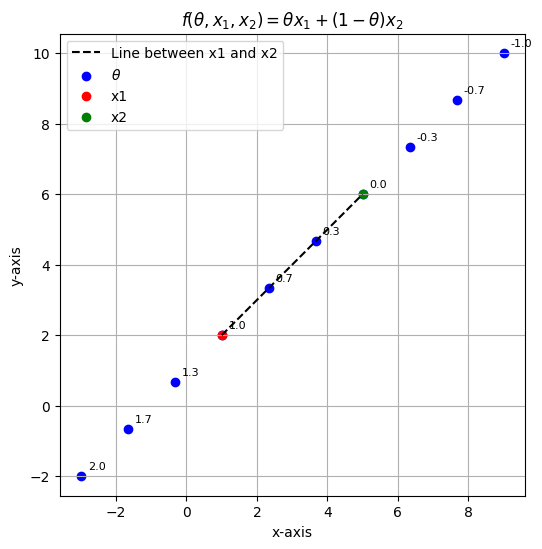

In [2]:
# @title
import numpy as np
import matplotlib.pyplot as plt

# Define two 2D points
x1 = np.array([1, 2])
x2 = np.array([5, 6])

# Generate theta values
thetas = np.linspace(-1, 2, 10)

# Compute convex combinations
points = [theta * x1 + (1 - theta) * x2 for theta in thetas]
points = np.array(points)

# Plot
plt.figure(figsize=(6, 6))
plt.plot([x1[0], x2[0]], [x1[1], x2[1]], 'k--', label='Line between x1 and x2')
plt.scatter(points[:, 0], points[:, 1], c='blue', label=r'$\theta$')
plt.scatter(*x1, color='red', label='x1')
plt.scatter(*x2, color='green', label='x2')

# Annotate thetas
for i, theta in enumerate(thetas):
    plt.annotate(f'{theta:.1f}', (points[i, 0], points[i, 1]), textcoords="offset points", xytext=(5,5), fontsize=8)

plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title(r'$f(\theta, x_1, x_2) = \theta x_1 + (1 - \theta) x_2$')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


The following is a list of convex functions.
- Convex Cone
- Halfspace
- Convex combination
- PolyHedra

Convex cone

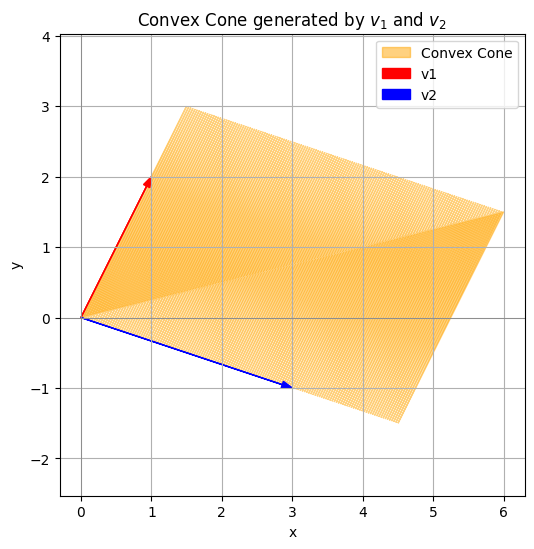

In [3]:
# @title
import numpy as np
import matplotlib.pyplot as plt

# Define generating vectors
v1 = np.array([1, 2])
v2 = np.array([3, -1])

# Generate convex cone by sweeping theta1 and theta2 ≥ 0
theta1 = np.linspace(0, 1.5, 150)
theta2 = np.linspace(0, 1.5, 150)
T1, T2 = np.meshgrid(theta1, theta2)

# Points in the cone
X = T1 * v1[0] + T2 * v2[0]
Y = T1 * v1[1] + T2 * v2[1]

# Plot the cone region
plt.figure(figsize=(6,6))
plt.fill(X.flatten(), Y.flatten(), color='orange', alpha=0.5, label='Convex Cone')

# Draw the generating vectors
plt.arrow(0, 0, *v1, color='red', head_width=0.1, length_includes_head=True, label='v1')
plt.arrow(0, 0, *v2, color='blue', head_width=0.1, length_includes_head=True, label='v2')

# Aesthetics
plt.title('Convex Cone generated by $v_1$ and $v_2$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.axis('equal')
plt.legend()
plt.show()


Half space $a^T*x <= b$

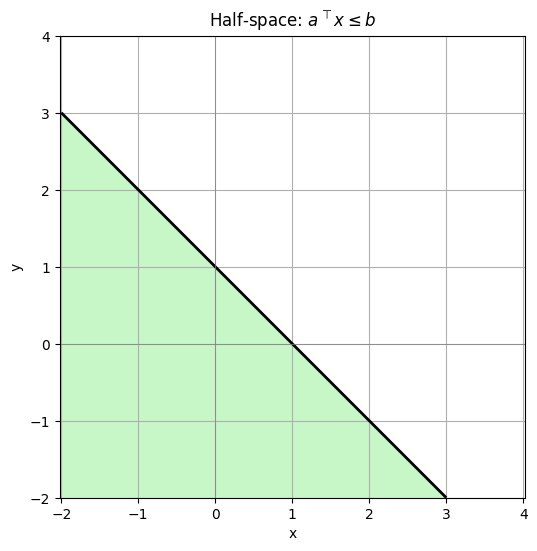

In [4]:
# @title
import numpy as np
import matplotlib.pyplot as plt

# Define the half-space: aᵀx ≤ b
a = np.array([1, 1])  # Coefficients of the inequality
b = 1                  # Right-hand side

# Create a grid of (x, y) points
x_vals = np.linspace(-2, 4, 400)
y_vals = np.linspace(-2, 4, 400)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute aᵀx over the grid
Z = a[0] * X + a[1] * Y

# Create a mask for the half-space
mask = Z <= b

# Plot
plt.figure(figsize=(6, 6))

# Fill only the feasible region
plt.contourf(X, Y, mask, levels=[0.5, 1], colors=['lightgreen'], alpha=0.5)

# Draw the boundary line (aᵀx = b)
plt.contour(X, Y, Z, levels=[b], colors='black', linewidths=2)

# Labels and aesthetics
plt.title(r'Half-space: $a^\top x \leq b$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)
plt.axis('equal')
plt.show()



### Convex Combination (k = 2, 3, 4)

A convex combination of $ k\  points \ \  ( x_1, x_2, \dots, x_k \in \mathbb{R}^n )$ is defined as:

$$
x = t_1 x_1 + t_2 x_2 + \cdots + t_k x_k
$$

subject to:

$$
t_i > 0 \quad \text{and} \quad \sum_{i=1}^k t_i = 1
$$

This ensures \( x \) lies in the convex hull of the points ( $x_1, \dots, x_k $).


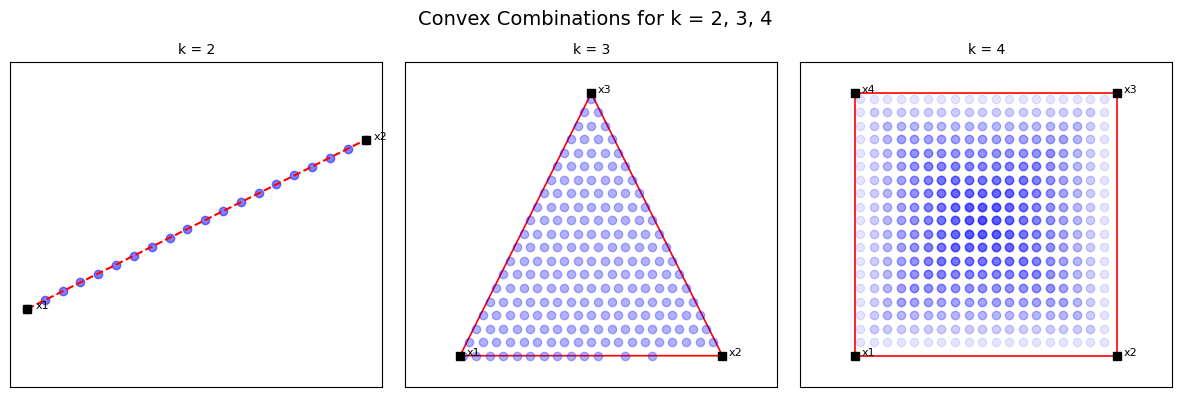

In [5]:
# @title
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

def plot_convex_subplot(ax, points, k):
    points = np.array(points)

    if k == 2:
        # Line segment: convex combination of 2 points
        for t in np.linspace(0, 1, 20):
            x = t * points[0] + (1 - t) * points[1]
            ax.plot(*x, 'bo', alpha=0.5)
        ax.plot(points[:,0], points[:,1], 'r--', label='Line segment')

    elif k == 3 or k == 4:
        t_vals = np.linspace(0.01, 0.99, 20)
        for t1 in t_vals:
            for t2 in t_vals:
                if k == 3:
                    t3 = 1 - t1 - t2
                    if t3 > 0:
                        x = t1*points[0] + t2*points[1] + t3*points[2]
                        ax.plot(*x, 'bo', alpha=0.3)
                else:
                    for t3 in t_vals:
                        t4 = 1 - t1 - t2 - t3
                        if t4 > 0:
                            x = t1*points[0] + t2*points[1] + t3*points[2] + t4*points[3]
                            ax.plot(*x, 'bo', alpha=0.1)

        # Polygon boundary
        poly = Polygon(points, closed=True, edgecolor='red', fill=False, linewidth=1.2)
        ax.add_patch(poly)

    # Plot original points
    for i, p in enumerate(points):
        ax.plot(*p, 'ks')
        ax.text(p[0]+0.05, p[1], f'x{i+1}', fontsize=8)

    ax.set_title(f'k = {k}', fontsize=10)
    ax.grid(True)
    ax.axis('equal')
    ax.set_xticks([])
    ax.set_yticks([])

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

plot_convex_subplot(axs[0], [[0, 0], [2, 1]], k=2)
plot_convex_subplot(axs[1], [[0, 0], [2, 0], [1, 2]], k=3)
plot_convex_subplot(axs[2], [[0, 0], [2, 0], [2, 2], [0, 2]], k=4)

fig.suptitle('Convex Combinations for k = 2, 3, 4', fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


Ployhedron with the 4 in-eqalities below.

- x≥0
- y≥0
- x≤2
- y≤1.5

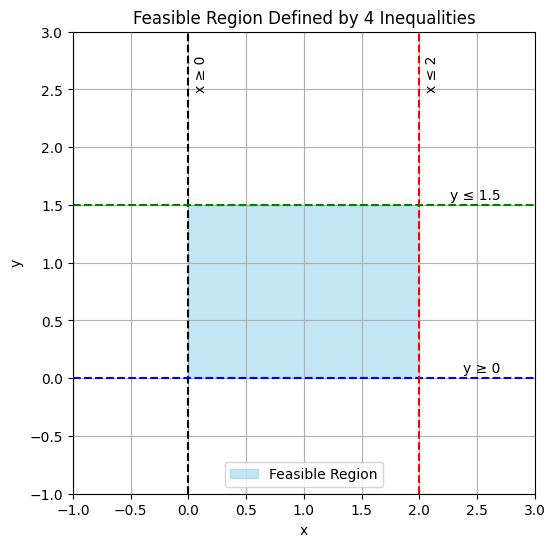

In [6]:
# @title
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(6,6))

# (1) x ≥ 0  → vertical line at x = 0
ax.plot([0, 0], [-1, 3], 'k--')
ax.text(0.05, 2.8, 'x ≥ 0', fontsize=10, rotation=90, va='top')

# (2) y ≥ 0  → horizontal line at y = 0
ax.plot([-1, 3], [0, 0], 'b--')
ax.text(2.7, 0.05, 'y ≥ 0', fontsize=10, ha='right')

# (3) x ≤ 2  → vertical line at x = 2
ax.plot([2, 2], [-1, 3], 'r--')
ax.text(2.05, 2.8, 'x ≤ 2', fontsize=10, rotation=90, va='top')

# (4) y ≤ 1.5 → horizontal line at y = 1.5
ax.plot([-1, 3], [1.5, 1.5], 'g--')
ax.text(2.7, 1.55, 'y ≤ 1.5', fontsize=10, ha='right')

region = np.array([
    [0, 0],
    [2, 0],
    [2, 1.5],
    [0, 1.5]
])

# Fill feasible region with color
ax.fill(region[:,0], region[:,1], color='skyblue', alpha=0.5, label='Feasible Region')

# Axes and labels
ax.set_xlim(-1, 3)
ax.set_ylim(-1, 3)
ax.set_aspect('equal')
ax.grid(True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Feasible Region Defined by 4 Inequalities')
ax.legend()
plt.show()


### Types of Convexity

| Type                | Inequality Form                                                           | Geometric Intuition                         | Unique Min? | Example               |   |          |
| ------------------- | ------------------------------------------------------------------------- | ------------------------------------------- | ----------- | --------------------- | - | -------- |
| **Convex**          | $f(\theta x + (1-\theta)y) \leq \theta f(x) + (1-\theta)f(y)$             | Curve lies below or on chord                | Not always  | (                     | x | ), $x^2$ |
| **Strictly Convex** | $f(\theta x + (1-\theta)y) < \theta f(x) + (1-\theta)f(y)$ for $x \neq y$ | Curve bends strictly below chord            | ✅ Yes       | $x^2$, $e^x$          |   |          |
| **Strongly Convex** | $f(y) \geq f(x) + \nabla f(x)^\top (y - x) + \frac{m}{2} \|y - x\|^2$     | Curve bounded below by a quadratic function | ✅ Yes       | $x^2 + 3x$, $\|x\|^2$ |   |          |

---


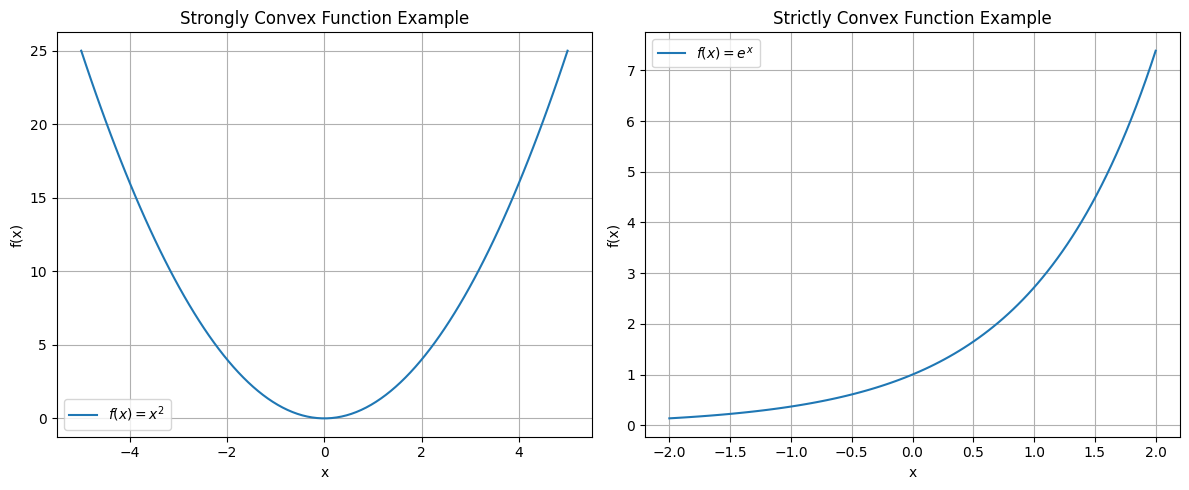

In [13]:
# @title
def plot_quadratic(ax):
    x = np.linspace(-5, 5, 100)
    y = x**2
    ax.plot(x, y, label=r'$f(x) = x^2 $')
    ax.set_title('Strongly Convex Function Example')
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.legend()
    ax.grid(True)

def plot_exponential(ax):
    x = np.linspace(-2, 2, 100)
    y = np.exp(x)
    ax.plot(x, y, label=r'$f(x) = e^x$')
    ax.set_title('Strictly Convex Function Example')
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.legend()
    ax.grid(True)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot strongly convex function
plot_quadratic(axs[0])
plot_exponential(axs[1])

plt.tight_layout()
plt.show()
